In [1]:
from itertools import product
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def floyd(graph):
    # initialize matrix
    distance = nx.adjacency_matrix(graph).todense().astype(float)
    distance[distance == 0] = np.inf
    np.fill_diagonal(distance, 0)
    
    # find shortest paths
    for k, i, j in product(range(len(graph)), repeat=3):
        distance[i, j] = min(distance[i, j], distance[i, k] + distance[k, j])
        
        # negative cycle detection
        if i == j and distance[i, j] < 0:
            return k, i, 'negative cycle detected'

    # shortest paths
    return {
        (i, j): distance[i, j]
        for i, j in product(range(len(graph)), repeat=2)
        if i != j and not np.isinf(distance[i, j])
    }

## graph

In [3]:
def generate_graph(n, edge_prob=.5, pos_weight_prob=.2):
    graph = nx.DiGraph()
    graph.add_nodes_from(range(n))
    
    for u, v in product(range(n), repeat=2):
        if u != v and np.random.rand() < edge_prob:
            weight = [-1, 1][np.random.rand() < pos_weight_prob]
            graph.add_edge(u, v, weight=weight)
            
    return graph

In [4]:
def draw_graph(graph):
    cm = {-1: 'red', 1: 'black'}
    colors = [cm[e['weight']]  for (u, v, e) in graph.edges(data=True)]

    plt.figure(figsize=(8, 8))
    plt.axis('off')

    layout = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=520)
    nx.draw_networkx_edges(graph, layout, edge_color=colors)
    nx.draw_networkx_labels(graph, layout, font_color='white')

## run

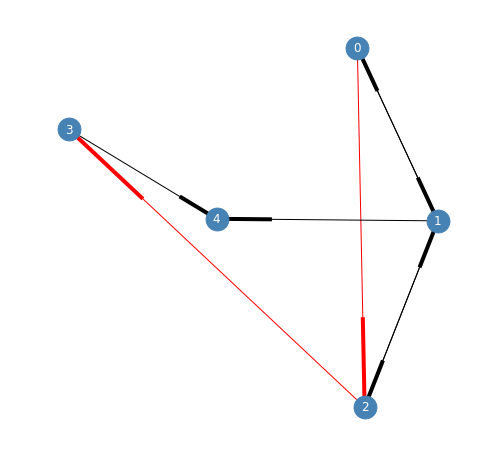

In [26]:
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.7)
draw_graph(graph)

In [27]:
floyd(graph)

{(0, 1): 0.0,
 (0, 2): -1.0,
 (0, 3): -2.0,
 (0, 4): -1.0,
 (1, 0): 1.0,
 (1, 2): 0.0,
 (1, 3): -1.0,
 (1, 4): 0.0,
 (2, 0): 2.0,
 (2, 1): 1.0,
 (2, 3): -1.0,
 (2, 4): 0.0,
 (3, 4): 1.0}

## run

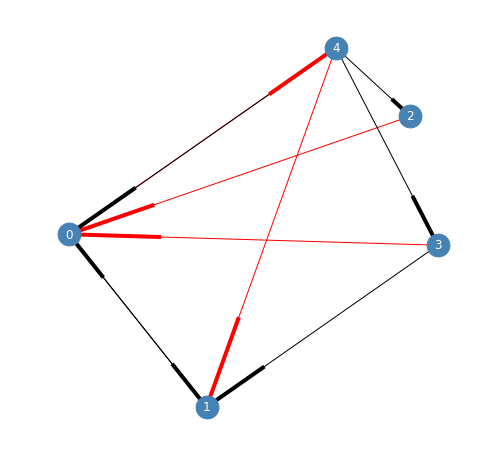

In [39]:
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.6)
draw_graph(graph)

In [40]:
floyd(graph)

(1, 4, 'negative cycle detected')